## Gather


In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer


### Twitter archive data


In [470]:
#read twitter archive csv file
twitter_arch = pd.read_csv('twitter-archive-enhanced-2.csv')


### Image Prediction Data

In [471]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image_request.content)

#read image prediction file
images_predict = pd.read_csv('image_predictions.tsv', sep = '\t')

### Tweet Data

In [472]:
#read downloaded tweet data
data_tweet = []
with open('tweet-json.txt','r') as json_file:
    for file in json_file:
        data = json.loads(file)
        data_tweet.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'], 
                        'favorite_count': data['favorite_count']})
tweet_data = pd.DataFrame(data_tweet,columns= ['tweet_id','favorite_count','retweet_count'])


## Access Data

In [473]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [474]:
images_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [475]:
tweet_data

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [476]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [477]:
images_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [478]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [479]:
all_columns = pd.Series(list(twitter_arch) + list(tweet_data) + list(images_predict))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [480]:
list(twitter_arch)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [481]:
twitter_arch[twitter_arch['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [482]:
twitter_arch.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [483]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [484]:
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [485]:
twitter_arch.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [486]:
twitter_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [487]:
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Humphrey        1
Timofy          1
Christoper      1
Grey            1
Miley           1
Name: name, Length: 957, dtype: int64

In [488]:
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [489]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [490]:
twitter_arch[twitter_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [491]:
twitter_arch.duplicated().sum()

0

In [492]:
list(images_predict)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [493]:
images_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [494]:
images_predict.duplicated().sum()

0

In [495]:
print(images_predict.p1.unique())
print(images_predict.p1_dog.unique())
print(images_predict.p2.unique())
print(images_predict.p2_dog.unique())
print(images_predict.p3.unique())
print(images_predict.p3_dog.unique())

['Welsh_springer_spaniel' 'redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'miniature_pinscher' 'Bernese_mountain_dog'
 'box_turtle' 'chow' 'shopping_cart' 'miniature_poodle' 'golden_retriever'
 'Gordon_setter' 'Walker_hound' 'pug' 'bloodhound' 'Lhasa'
 'English_setter' 'hen' 'desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'three-toed_sloth' 'ox' 'malamute' 'guinea_pig'
 'soft-coated_wheaten_terrier' 'Chihuahua' 'black-and-tan_coonhound'
 'coho' 'toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'llama'
 'Chesapeake_Bay_retriever' 'curly-coated_retriever' 'dalmatian'
 'Ibizan_hound' 'Border_collie' 'Labrador_retriever' 'seat_belt' 'snail'
 'miniature_schnauzer' 'Airedale' 'triceratops' 'swab' 'hay' 'hyena'
 'jigsaw_puzzle' 'West_Highland_white_terrier' 'toy_poodle'
 'giant_schnauzer' 'vizsla' 'vacuum' 'Rottweiler' 'Siberian_husky' 'teddy'
 'papillon' 'Saint_Bernard' 'porcupine' 'goose' 'Tibetan_terrier' 'borzoi'
 'beagle' 'hare' 'Yorkshire_terrier' 'Pomeranian' 'electric_fan'
 'web_si

In [496]:
print(images_predict.p1_dog.value_counts())
print(images_predict.p2_dog.value_counts())
print(images_predict.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [497]:
images_predict.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
cowboy_boot             1
snowmobile              1
hare                    1
sliding_door            1
clumber                 1
Name: p1, Length: 378, dtype: int64

In [498]:
images_predict.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
quail                   1
wood_rabbit             1
menu                    1
horse_cart              1
tarantula               1
Name: p2, Length: 405, dtype: int64

In [499]:
images_predict.p3.value_counts()

Labrador_retriever          79
Chihuahua                   58
golden_retriever            48
Eskimo_dog                  38
kelpie                      35
                            ..
banana                       1
African_grey                 1
European_fire_salamander     1
jersey                       1
crayfish                     1
Name: p3, Length: 408, dtype: int64

In [500]:
images_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [501]:
list(tweet_data)

['tweet_id', 'favorite_count', 'retweet_count']

In [502]:
tweet_data.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [503]:
tweet_data.tweet_id.duplicated().sum()

0

In [504]:
tweet_data.duplicated().sum()

0

In [505]:
tweet_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Quality Issues
##### Twitter_arch table  ##### 
>* We only want original ratings (no retweets) that have images.
>* Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.
>* The rating numerator and denominator columns should be float not integer.
>* create a new column from rating numerator and denominator
>* Timestamp should be datetime instead of object (string).
>* Separate timestamp into day - month - year (3 columns)
>* Convert None to NaN in all columns.
>* Delete columns that won't be used for analysis.

##### images_predict table ####
>* image prediction(p1,p2,p3) should be in a column as well as confidence level(p1_conf,p2_conf,p3_conf)
>* Delete columns that won't be used for analysis.


##### tweet_data ####
>* Missing data.

## Tidiness Issues

>* Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.
>* Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.

## Clean

In [506]:
twitter_arch_clean = twitter_arch.copy()
images_predict_clean = images_predict.copy()
tweet_data_clean = tweet_data.copy()

##### Define
Timestamp should be datetime instead of object (string).

##### Code

In [507]:
#convert timestamp to datetime
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

##### Test #####

In [508]:
twitter_arch_clean['timestamp'].dtypes

datetime64[ns, UTC]

##### Define
Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.

In [509]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_arch_clean = pd.melt(twitter_arch_clean, id_vars=['tweet_id','in_reply_to_status_id',
                                                          'in_reply_to_user_id',
                                                          'timestamp',
                                                          'source',
                                                          'text',
                                                          'retweeted_status_id',
                                                          'retweeted_status_user_id',
                                                          'retweeted_status_timestamp',
                                                          'expanded_urls',
                                                          'rating_numerator',
                                                          'rating_denominator',
                                                          'name',],
 
                               var_name='dogs', value_name='dogs_stage')

#drop dogs
twitter_arch_clean = twitter_arch_clean.drop('dogs', 1)

#Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_arch_clean = twitter_arch_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [510]:
#TEST
twitter_arch_clean['dogs_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

##### Define
Separate timestamp into day - month - year (3 columns)

In [511]:
#CODE
twitter_arch_clean['year'] = twitter_arch_clean['timestamp'].dt.year
twitter_arch_clean['month'] = twitter_arch_clean['timestamp'].dt.month
twitter_arch_clean['day'] = twitter_arch_clean['timestamp'].dt.day

In [512]:
#TEST
list(twitter_arch_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

##### Define
>* Image prediction(p1,p2,p3) should be in a column as well as confidence level(p1_conf,p2_conf,p3_conf)



In [513]:
#CODE: 
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
conf_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(images_predict_clean):
    if images_predict_clean['p1_dog'] == True:
        dog_type.append(images_predict_clean['p1'])
        conf_list.append(images_predict_clean['p1_conf'])
    elif images_predict_clean['p2_dog'] == True:
        dog_type.append(images_predict_clean['p2'])
        conf_list.append(images_predict_clean['p2_conf'])
    elif images_predict_clean['p3_dog'] == True:
        dog_type.append(images_predict_clean['p3'])
        conf_list.append(images_predict_clean['p3_conf'])
    else:
        dog_type.append('Error')
        conf_list.append('Error')

#series objects having index the image_prediction_clean column.        
images_predict_clean.apply(image, axis=1)

#create new columns
images_predict_clean['dog_type'] = dog_type
images_predict_clean['conf_list'] = conf_list

#drop rows that has prediction_list 'error'
images_predict_clean = images_predict_clean[images_predict_clean['dog_type'] != 'Error']

In [514]:
#TEST: 
images_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1751 non-null   int64  
 1   jpg_url    1751 non-null   object 
 2   img_num    1751 non-null   int64  
 3   p1         1751 non-null   object 
 4   p1_conf    1751 non-null   float64
 5   p1_dog     1751 non-null   bool   
 6   p2         1751 non-null   object 
 7   p2_conf    1751 non-null   float64
 8   p2_dog     1751 non-null   bool   
 9   p3         1751 non-null   object 
 10  p3_conf    1751 non-null   float64
 11  p3_dog     1751 non-null   bool   
 12  dog_type   1751 non-null   object 
 13  conf_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


##### Define
>* Delete columns that won't be used for analysis.

In [515]:
#CODE
#Delete columns
images_predict_clean = images_predict_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


In [516]:
#TEST
list(images_predict_clean)

['tweet_id', 'jpg_url', 'dog_type', 'conf_list']

##### Define
>* Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.

In [517]:
#CODE
twitter_arch.name = twitter_arch.name.str.replace('^[a-z]+', 'None')
twitter_arch.replace('None', 
                        np.nan,
                       inplace = True)

In [518]:
#TEST
twitter_arch['name'].value_counts()

Charlie     12
Oliver      11
Lucy        11
Cooper      11
Tucker      10
            ..
Sparky       1
Mac          1
Lassie       1
Griswold     1
Miley        1
Name: name, Length: 931, dtype: int64

##### Define
The rating numerator and denominator columns should be float not integer.

In [519]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
twitter_arch_clean[['rating_numerator', 'rating_denominator']] = twitter_arch_clean[['rating_numerator',
                                                                            'rating_denominator']].astype(float)


In [520]:
#TEST
twitter_arch_clean[['rating_numerator', 'rating_denominator']].dtypes

rating_numerator      float64
rating_denominator    float64
dtype: object

##### Define
create a new column from rating numerator and denominator

In [521]:
#CODE
twitter_arch_clean['rating'] = 10 * twitter_arch_clean['rating_numerator'] / twitter_arch_clean['rating_denominator'].astype(float)


In [522]:
#TEST
twitter_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
4431,670840546554966016,NaN,NaN,2015-11-29 05:43:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10.0,10.0,Colby,None,2015,11,29,10.0
2750,825829644528148480,NaN,NaN,2017-01-29 22:15:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12.0,10.0,Toby,None,2017,1,29,12.0
2933,800855607700029440,NaN,NaN,2016-11-22 00:17:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,79923701.0,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11.0,10.0,None,None,2016,11,22,11.0
4025,682429480204398592,NaN,NaN,2015-12-31 05:14:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I know we joke around on here, but this is get...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682429480...,8.0,10.0,None,None,2015,12,31,8.0
3642,708400866336894977,NaN,NaN,2016-03-11 21:15:02+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12.0,10.0,None,None,2016,3,11,12.0


##### Define
>* Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.

In [523]:
#CODE
twitter_tweets = pd.merge(twitter_arch_clean, images_predict_clean, how ='left', on = ['tweet_id'])
twitter_tweets = pd.merge(twitter_tweets, tweet_data_clean, how ='left', on = ['tweet_id'])

In [524]:
#TEST
twitter_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

##### Define
>* We only want original ratings (no retweets) that have images.

In [525]:
#CODE
# Delete the retweets
twitter_tweets = twitter_tweets[np.isnan(twitter_tweets.retweeted_status_id)]

# Delete duplicated tweet_id
twitter_tweets = twitter_tweets.drop_duplicates()

# Delete tweets with no pictures
twitter_tweets = twitter_tweets.dropna(subset = ['jpg_url'])


In [526]:
#TEST
#twitter_tweets.head()
twitter_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 3 to 2355
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1686 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1686 non-null   datetime64[ns, UTC]
 4   source                      1686 non-null   object             
 5   text                        1686 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1686 non-null   object             
 10  rating_numerator            1686 non-null   float64         

##### Define
Delete columns that won't be used for analysis.

In [527]:
#CODE
twitter_tweets = twitter_tweets.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source','retweeted_status_id',
                                      'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','rating_numerator',
                                      'rating_denominator'], 1)


In [528]:
list(twitter_tweets)

['tweet_id',
 'timestamp',
 'text',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day',
 'rating',
 'jpg_url',
 'dog_type',
 'conf_list',
 'favorite_count',
 'retweet_count']

In [529]:
twitter_tweets['dog_type'].replace("None", np.nan, inplace=True)

In [530]:
twitter_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 3 to 2355
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1686 non-null   int64              
 1   timestamp       1686 non-null   datetime64[ns, UTC]
 2   text            1686 non-null   object             
 3   name            1686 non-null   object             
 4   dogs_stage      1686 non-null   object             
 5   year            1686 non-null   int64              
 6   month           1686 non-null   int64              
 7   day             1686 non-null   int64              
 8   rating          1686 non-null   float64            
 9   jpg_url         1686 non-null   object             
 10  dog_type        1686 non-null   object             
 11  conf_list       1686 non-null   object             
 12  favorite_count  1686 non-null   float64            
 13  retweet_count   1686 non-null   f

In [531]:
#Store the clean DataFrame in a CSV file
twitter_tweets.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

# Analyzing and visualizing data

In [532]:
df = pd.read_csv('twitter_archive_master.csv')
df.sample(5)

,tweet_id,timestamp,text,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,conf_list,favorite_count,retweet_count
788,683857920510050305,2016-01-04 03:50:08+00:00,Meet Sadie. She fell asleep on the beach and h...,Sadie,None,2016,1,4,10.0,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,bluetick,0.174738,4163.0,1262.0
914,814153002265309185,2016-12-28 16:56:16+00:00,This is Oshie. He's ready to party. Bought tha...,Oshie,None,2016,12,28,12.0,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,golden_retriever,0.490068,32000.0,10080.0
1609,704761120771465216,2016-03-01 20:11:59+00:00,This pupper killed this great white in an epic...,None,pupper,2016,3,1,13.0,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,Chihuahua,0.100418,7283.0,3257.0
1672,756275833623502848,2016-07-21 23:53:04+00:00,When ur older siblings get to play in the deep...,None,puppo,2016,7,21,10.0,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,Airedale,0.602957,7114.0,1738.0
998,798209839306514432,2016-11-14 17:03:50+00:00,This is Cooper. His bow tie was too heavy for ...,Cooper,None,2016,11,14,13.0,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,Pekinese,0.524583,11548.0,2954.0


In [533]:
df.describe()

,tweet_id,year,month,day,rating,conf_list,favorite_count,retweet_count
count,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,7.392710e+17,2015.884935,7.010083,15.927639,10.891952,0.549936,9233.109727,2817.118031
std,6.800607e+16,0.694906,4.105062,8.832674,2.507908,0.299270,12583.246963,4807.199770
min,6.660209e+17,2015.000000,1.000000,1.000000,0.000000,0.000010,81.000000,16.000000
25%,6.773835e+17,2015.000000,3.000000,8.000000,10.000000,0.302892,2163.250000,649.250000
50%,7.132943e+17,2016.000000,7.000000,16.000000,11.000000,0.550604,4440.000000,1437.500000
75%,7.931770e+17,2016.000000,11.000000,24.000000,12.000000,0.821962,11656.750000,3247.750000
max,8.921774e+17,2017.000000,12.000000,31.000000,75.000000,0.999956,132810.000000,79515.000000


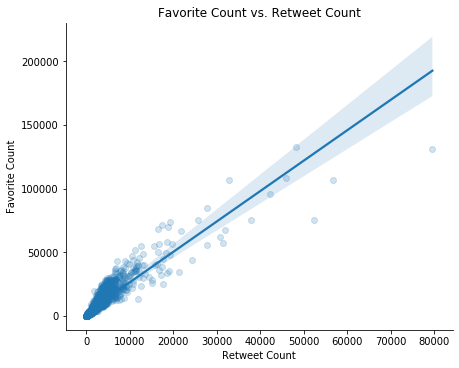

In [534]:
# Scatterplot of retweets vs favorite count

sb.lmplot(x="retweet_count", 
           y="favorite_count", 
           data= df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

> From the chart above, we can see that:
>* There is a positive correlation between favourite count and retweet count. As favourite count increases, retweet count also increases.

In [602]:
dog_stage.groupby('dogs_stage')[["retweet_count","favorite_count"]].mean()

,retweet_count,favorite_count
dogs_stage,,
doggo,7059.870370,19404.240741
floofer,4776.750000,13701.375000
pupper,2501.318182,7766.414773
puppo,6958.500000,22657.181818


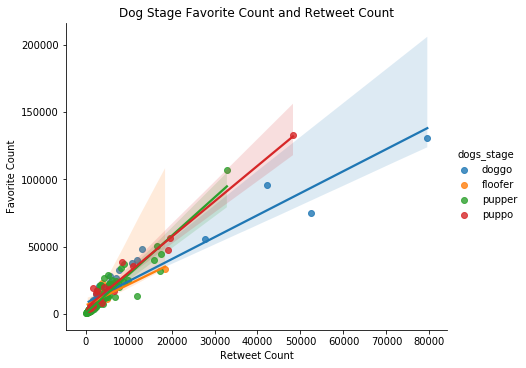

In [567]:
#Dog Stage Favorite Count and Retweet Count
dog_stage = df[df['dogs_stage'] != 'None']
sb.lmplot(x="retweet_count", 
           y="favorite_count", 
          hue = "dogs_stage",
           data= dog_stage,
           height = 5,
           aspect=1.3)
           #scatter_kws={'alpha':1/5});

plt.title('Dog Stage Favorite Count and Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

> From the visualization above, we can see that:
>* Puppo has the highest number of favourite count while doggo has the higest number of retweet count.

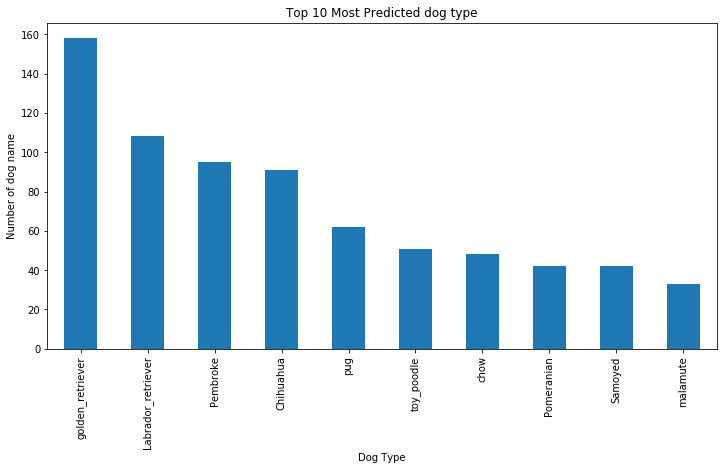

In [599]:
#Top 10 Most Predicted dog type
dog_type = df.dog_type.value_counts().head(10)
plt.figure(figsize=(12,6))
dog_type.plot(kind ='bar');
plt.title('Top 10 Most Predicted dog type')
plt.xlabel('Dog Type')
plt.ylabel('Number of dog name');


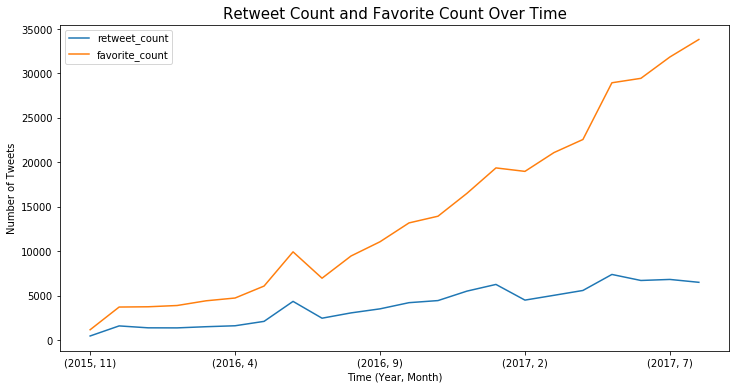

In [600]:
#Retweet Count and Favorite Count Over Time
plt.figure(figsize=(12,6))
df.retweet_count.groupby([df['year'], df['month']]).mean().plot(kind='line')
df.favorite_count.groupby([df['year'], df['month']]).mean().plot(kind='line')
plt.title('Retweet Count and Favorite Count Over Time', size =15)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend();

> From the Chart above, we can see that:
>* There are more favorites than retweets. 
>* Both favorites and retweets, increased over the time. While the favorite count increases strongly with the number of retweets.